In [2]:
import wave, pyaudio, librosa


filename = "samples/IMPRSNL - Intimidation.wav"
chunk = 1024
wf = wave.open(filename, 'rb')
pa = pyaudio.PyAudio()

# create stream using info from the file
stream = pa.open(format = pa.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = int(wf.getframerate()),
                output = True)

# read in the frames as data
data = wf.readframes(chunk)

print(data[0])


# while the data isn't empty
while data != b'':
    stream.write(data)
    data = wf.readframes(chunk)

# cleanup
stream.close()
pa.terminate()



124


KeyboardInterrupt: 

In [23]:
import numpy as np
import matplotlib.pyplot as plt 
files = librosa.util.find_files("samples")

sample, sr = librosa.load(files[0], sr=None)
sample

array([-4.8286319e-03, -3.7137866e-03, -1.5404820e-03, ...,
        7.4505806e-06,  7.3313713e-06,  7.3909760e-06], dtype=float32)

[[-40.699173 -44.963005 -67.41184  ... -80.       -78.25665  -80.      ]
 [-39.823204 -42.53414  -51.60819  ... -76.413246 -77.31237  -80.      ]
 [-39.823708 -39.149014 -52.023502 ... -74.98588  -80.       -80.      ]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]]


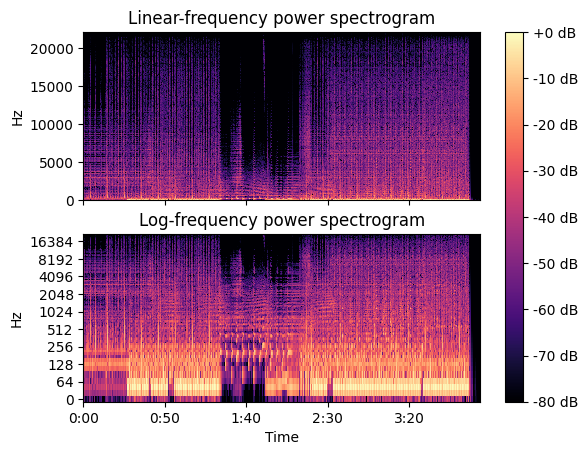

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
D = librosa.amplitude_to_db(np.abs(librosa.stft(sample)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()
print(D)

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(sample, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")